# Part 1
#### **Mention 10 examples of encoding**
1. Position
1. Length
1. Area
1. Shape
1. Color
1. angle
1. Line weight
1. Line ending
1. Texture
1. Pattern

#### **Are all encodings created equally?**
No pie charts make it hard to distinguish between size of numbers.

#### **3 encodings hard for the human eye to parse**
- Pie chart
- 
-

#### **What is the problem with a pie chart**
Hard to distinguish between size of numbers

# Part 2
### **Exercise 2.1**
#### **Looking at Fig 3-1, Janert writes, "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?**

The weird stuff that's happening to the data could be noise, but because the shift is repetitive, it hints that it is a pattern and not noise.

#### **Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?**
If you take humans overall in a statistic where, for example, women and men are different, the relationship would be multivariate. We saw this earlier with the relationship between steps and BMI.

#### **What are the two methods Janet mentions for smoothing noisy data? Can you think of other ones?**
**Answer:** weighted splines and *LOESS (locally weighted regression).

Kernel smoothing is another example. Gaussian smoothing is also another example.

#### **What are residuals? Why is it a good idea to plot the residuals of your fit?**
Residuals are the remainder when the smooth trend is subtracted from the actual data. That is how much does our smooth curve deviate from the real data.

It is a good idea to plot the residual, as it gives a visualisation of how well the smoothing is fitted to the data. If the residual is located around 0, it means that the fit is quite good, and if it deviates a lot, it tells us that the smoothed plot is not very representative of the 


#### **Explain in your own words the point of the smooth tube in figure 3-7.**
The solid line is the best approximation of all the points, and the lower and upper dashed lines the points where the residual is either negative or positive. The point is that we can, with some certainty say, that the points will lie between the two dashed lines.

#### **What the hell is banking, and what part of our visual system does it use to help us see patterns? What are potential problems with banking?**
Banking is changing the aspect ratio, so the curves on the graphs are closer to 45 degrees. This is typically done by changing the aspect ration.

#### **SummariseSummarise the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.**

**Graphical Analysis** is the process of using graphical tools to analyse data. This is often done without knowing the end result and is done as an exploration.

**Presention graphics** are done when you already know the end result, and want to show it in a graphical way. We have already established how the data relates, now we want to show it.

### **Exercise 2.2**
**What kind of relationship does loglog plot help discoder**: This plot shows if (typically) the y-coordinate relationship 


**What kind of relationship does semi-log plot help discoder**: Both axis have an exponential proportions

### **Display plot from week1 in y-log scale**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from math import radians, cos, sin, asin, sqrt

sns.set_theme()

In [2]:
df = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

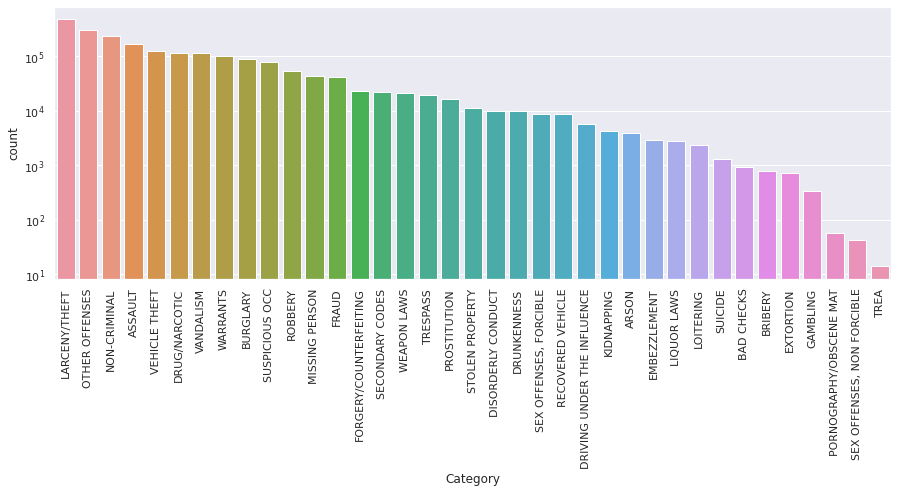

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.set(yscale="log")
sns.countplot(x="Category", data=df, order=df.Category.value_counts().index, ax=ax)
plt.xticks(rotation=90);

## **LogLog theft plot**

#### **Step 1** Divide into $100m \times 100m$ grid

In [69]:

# Removing outliers
df_theft = df[(df.Y < 50) & (df.X  < -122) & (df.Category == "LARCENY/THEFT")]
print(f"Removed {df.shape[0] - df_theft.shape[0]} outliers")

# Function for calculating the distance between two points based on their longitude and lattitude
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# Finding boundary of san fransisco
lat_min = df_theft.Y.min()
lat_max = df_theft.Y.max()
lon_min = df_theft.X.min()
lon_max = df_theft.X.max()

# Estimating bin amount along different borders
print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")
print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 

count, lon, lat = np.histogram2d(df_theft.Y, df_theft.X, bins = [130,125])

Removed 1651578 outliers
Estimated bin amount along the northern border of San Fransisco: 130.78123566673807
Estimated bin amount along the eastern border of San Fransisco: 125.31549767057172
Estimated bin amount along the southern border of San Fransisco: 130.9806686298538
Estimated bin amount along the western border of San Fransisco: 125.31549767057172


/tmp/ipykernel_3618/3217873043.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


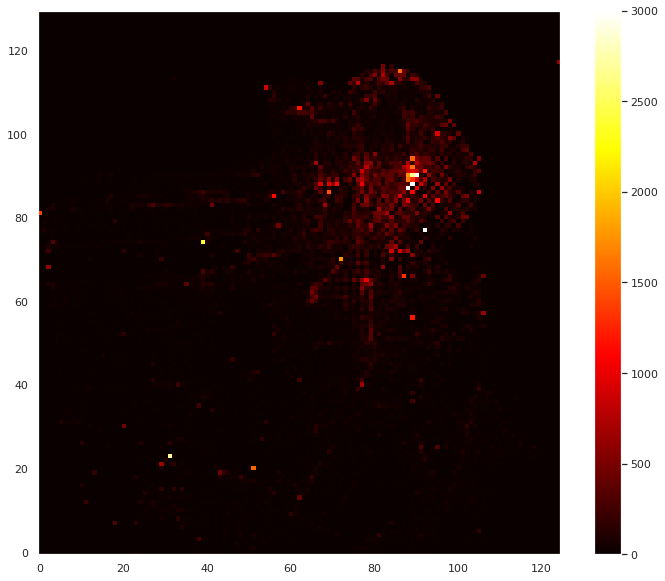

In [70]:
plt.figure(figsize=(12,10))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.grid(False);
plt.colorbar();

#### **Step 2**: Count the number of thefts in each square

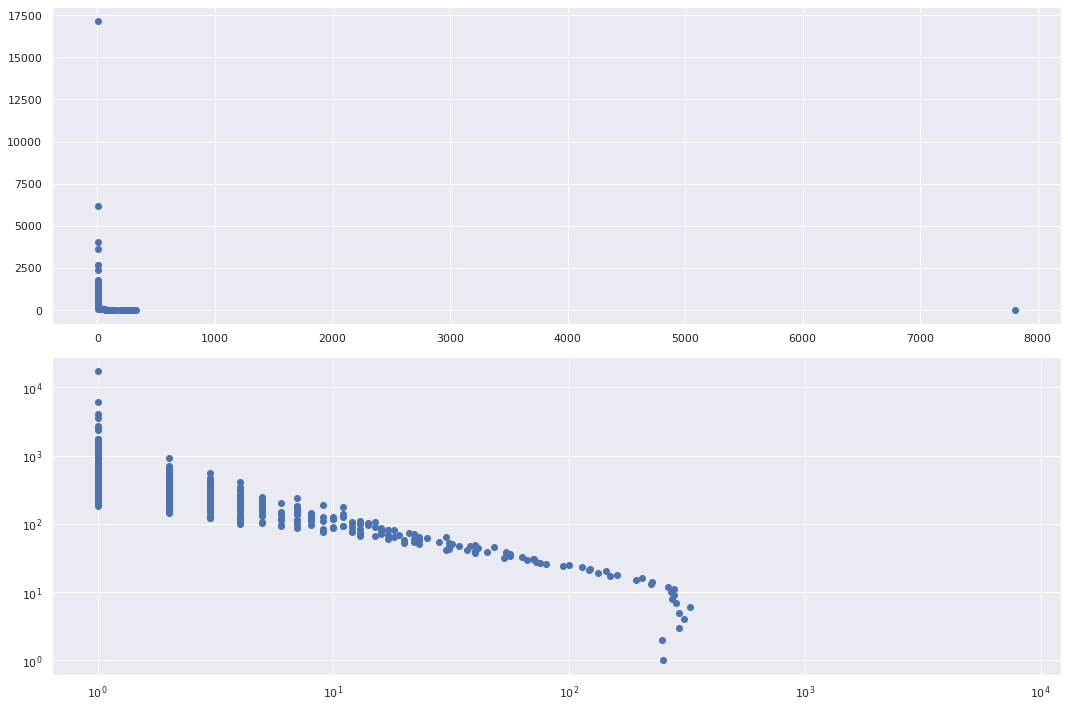

In [101]:
unique, N = np.unique(count, return_counts=True)
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15, 10))

ax1.scatter(N, unique);
ax2.scatter(N, unique);
ax2.set(yscale="log", xscale="log");
plt.tight_layout()

## Part 3
#### **Describe in your own words how data is organized in `sklearn` (how does a *dataset* work according to the tutorial)?**
Data in sklearn is orginised in samples and features, or more commonly known as data and labels (x, Y).

#### **What is the dimensionality of the `.data` part of a dataset and what is the size of each dimension?**
Dimensionality is always a 2d-array, with `n_samples`, and `n_features`

# Part 4
Something with sklearn

#### **Exercise 4.1** pairplot with unique combinations


In [61]:
from sklearn.linear_model import LinearRegression
import itertools
from tqdm import tqdm

In [133]:
n = 14
k = 2
num = np.math.factorial(n)//(np.math.factorial(k) * np.math.factorial(n - k))
print(f"Num of unique combinations: {num}")

Num of unique combinations: 91


In [31]:
# Creating datetime and hour of week column
df["dt"] = pd.to_datetime(df.Date + df.Time, format="%m/%d/%Y%H:%M")
df['hour_of_the_week'] = df['dt'].dt.dayofweek * 24 + (df['dt'].dt.hour + 1)

100%|██████████| 91/91 [00:24<00:00,  3.79it/s]


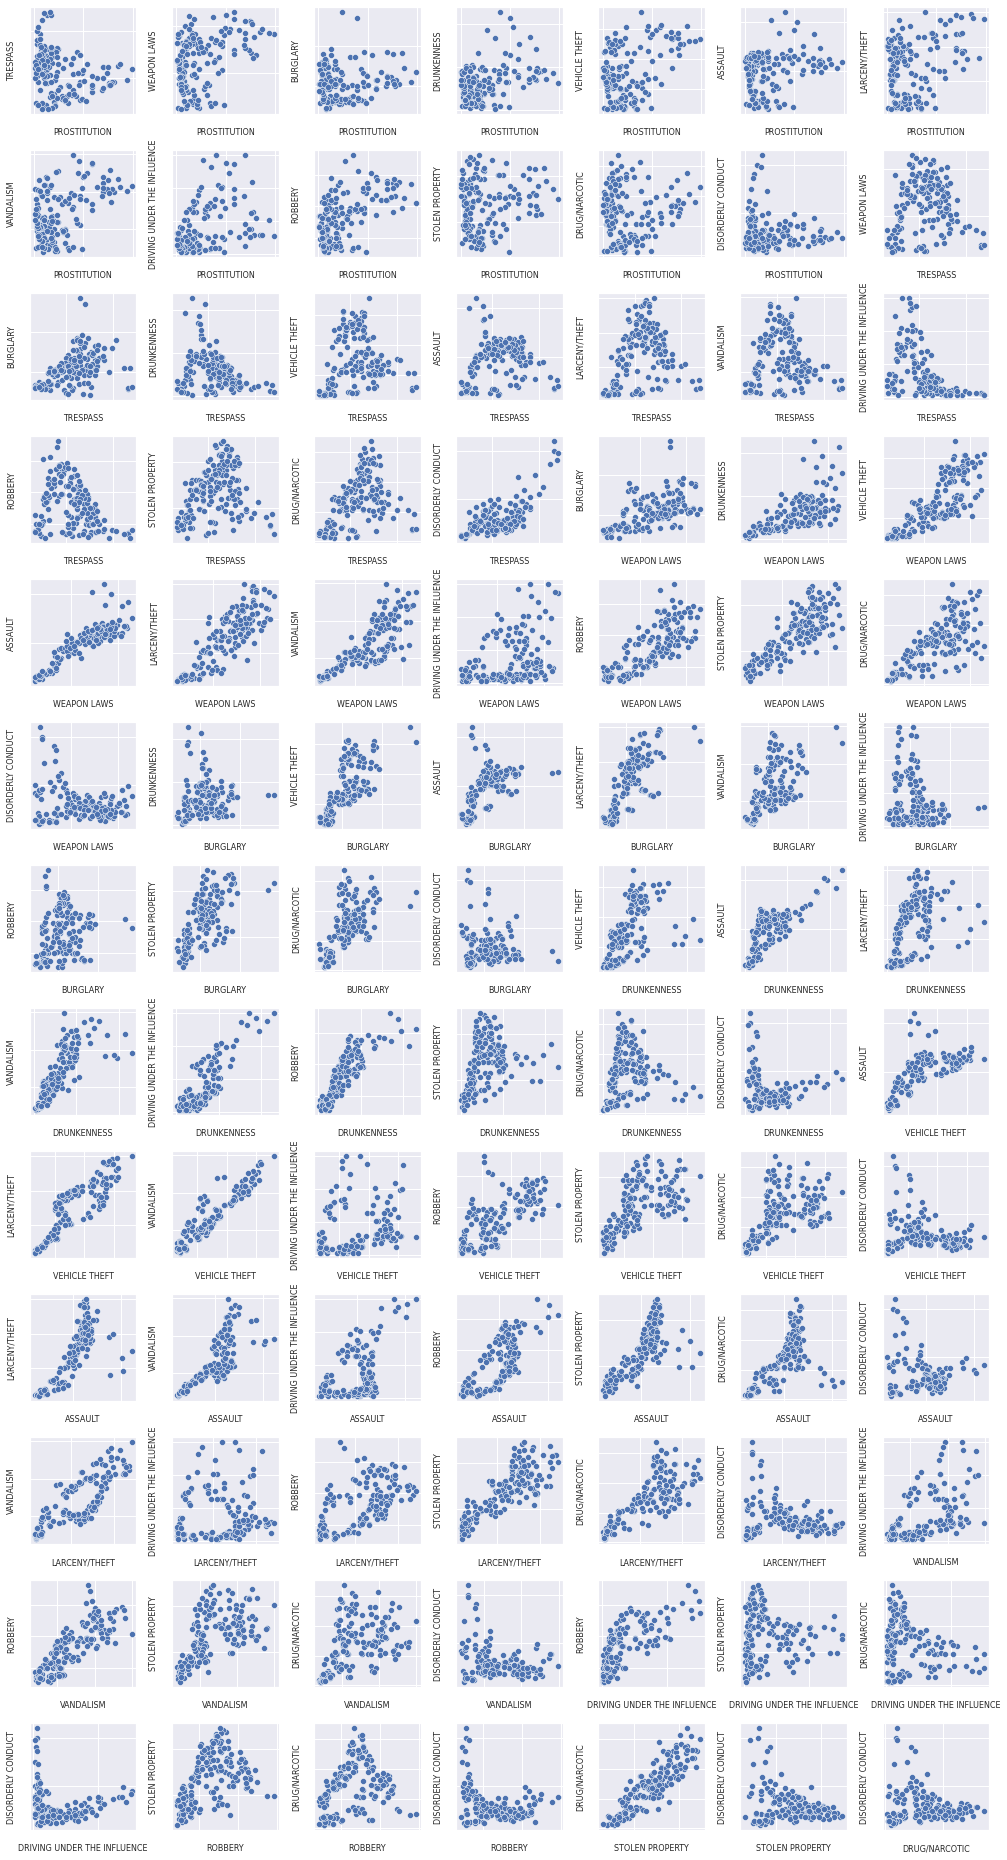

In [47]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

combine_crimes = list(itertools.combinations(focuscrimes, 2))

scale = 2
fig, axes = plt.subplots(13, 7, figsize=(7*scale, 13*scale))
for (x_crime, y_crime), ax in tqdm(zip(combine_crimes, axes.flatten()), total=len(combine_crimes)):
    x = df[df.Category == x_crime].hour_of_the_week.value_counts()
    y = df[df.Category == y_crime].hour_of_the_week.value_counts()
    sns.scatterplot(x=x, y=y, ax=ax)
    ax.set_xlabel(x_crime, fontsize=8)
    ax.set_ylabel(y_crime, fontsize=8)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.tight_layout()
plt.savefig("w4_scatter.png")
plt.show()

In [138]:
scale = 2
for (x_crime, y_crime) in  combine_crimes:
    x = df[df.Category == x_crime].hour_of_the_week.value_counts().values
    y = df[df.Category == y_crime].hour_of_the_week.value_counts().values
    reg = LinearRegression().fit(x.reshape(-1, 1), y)
    print(f"x:{x_crime:30}y:{y_crime:30}\t slope:{reg.coef_}\tintercept: {reg.intercept_:5.2f}\tscore: {reg.score(x.reshape(-1, 1), y)*100:.2f}%")

x:PROSTITUTION                  y:TRESPASS                      	 slope:[0.43759589]	intercept: 71.27	score: 85.22%
x:PROSTITUTION                  y:WEAPON LAWS                   	 slope:[0.50435306]	intercept: 75.49	score: 75.07%
x:PROSTITUTION                  y:BURGLARY                      	 slope:[1.99355245]	intercept: 346.26	score: 89.18%
x:PROSTITUTION                  y:DRUNKENNESS                   	 slope:[0.422907]	intercept: 16.56	score: 92.49%
x:PROSTITUTION                  y:VEHICLE THEFT                 	 slope:[4.24848737]	intercept: 334.07	score: 90.45%
x:PROSTITUTION                  y:ASSAULT                       	 slope:[3.47707552]	intercept: 652.78	score: 68.96%
x:PROSTITUTION                  y:LARCENY/THEFT                 	 slope:[14.83374872]	intercept: 1388.11	score: 79.20%
x:PROSTITUTION                  y:VANDALISM                     	 slope:[3.22787631]	intercept: 365.80	score: 91.20%
x:PROSTITUTION                  y:DRIVING UNDER THE INFLUENCE   	 s